# Exploring EDF file and MNE library

This notebook is used to explore the EDF file and the MNE library.

## GPU setup

In [1]:
import mne
import pandas as pd

In [66]:
!nvidia-smi

Fri Aug 26 23:16:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   51C    P8     4W /  N/A |    309MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [84]:
print(mne.get_config('MNE_USE_CUDA'))
print(type(mne.get_config('MNE_USE_CUDA')))

true
<class 'str'>


In [76]:
print(mne.get_config('missing_config_key', default='fallback value'))

fallback value


In [77]:
mne.get_config(key=None)

{}

In [78]:
print(mne.get_config(key=''))

('MNE_3D_OPTION_ANTIALIAS', 'MNE_3D_OPTION_DEPTH_PEELING', 'MNE_3D_OPTION_MULTI_SAMPLES', 'MNE_3D_OPTION_SMOOTH_SHADING', 'MNE_3D_OPTION_THEME', 'MNE_BROWSE_RAW_SIZE', 'MNE_BROWSER_BACKEND', 'MNE_BROWSER_OVERVIEW_MODE', 'MNE_BROWSER_PRECOMPUTE', 'MNE_BROWSER_THEME', 'MNE_BROWSER_USE_OPENGL', 'MNE_CACHE_DIR', 'MNE_COREG_ADVANCED_RENDERING', 'MNE_COREG_COPY_ANNOT', 'MNE_COREG_FULLSCREEN', 'MNE_COREG_GUESS_MRI_SUBJECT', 'MNE_COREG_HEAD_HIGH_RES', 'MNE_COREG_HEAD_OPACITY', 'MNE_COREG_HEAD_INSIDE', 'MNE_COREG_INTERACTION', 'MNE_COREG_MARK_INSIDE', 'MNE_COREG_PREPARE_BEM', 'MNE_COREG_ORIENT_TO_SURFACE', 'MNE_COREG_SCALE_LABELS', 'MNE_COREG_SCALE_BY_DISTANCE', 'MNE_COREG_SCENE_SCALE', 'MNE_COREG_WINDOW_HEIGHT', 'MNE_COREG_WINDOW_WIDTH', 'MNE_COREG_SUBJECTS_DIR', 'MNE_CUDA_DEVICE', 'MNE_CUDA_IGNORE_PRECISION', 'MNE_DATA', 'MNE_DATASETS_BRAINSTORM_PATH', 'MNE_DATASETS_EEGBCI_PATH', 'MNE_DATASETS_EPILEPSY_ECOG_PATH', 'MNE_DATASETS_HF_SEF_PATH', 'MNE_DATASETS_MEGSIM_PATH', 'MNE_DATASETS_MISC_PATH

In [79]:
mne.set_config('MNEE_USE_CUUDAA', 'false')

/tmp/ipykernel_2506/2766955246.py:1: RuntimeWarning: Setting non-standard config type: "MNEE_USE_CUUDAA"
  mne.set_config('MNEE_USE_CUUDAA', 'false')


In [82]:
mne.set_config('MNEE_USE_CUUDAA', None)
assert 'MNEE_USE_CUUDAA' not in mne.get_config('')

/tmp/ipykernel_2506/1474772638.py:1: RuntimeWarning: Setting non-standard config type: "MNEE_USE_CUUDAA"
  mne.set_config('MNEE_USE_CUUDAA', None)


In [85]:
mne.set_config('MNE_USE_CUDA', 'true')

## Load data

In [14]:
file = "/mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb13/chb13_58.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /mnt/e/Documents/projects/seizure-prediction/data/chb-mit-scalp-eeg-database-1.0.0/chb13/chb13_58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_2416/4175206233.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_2416/4175206233.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data = mne.io.read_raw_edf(file)


In [15]:
pd.DataFrame(raw_data.T, columns=channels)

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-9.006105e-05,5.919414e-05,1.504274e-05,1.510134e-04,-0.000001,-1.420269e-04,6.857143e-05,5.665446e-06,2.029792e-04,-0.000001,...,-4.239316e-05,4.512821e-05,-7.169719e-05,3.770452e-05,-0.000001,-1.465201e-05,-9.496459e-04,9.011966e-04,1.174115e-04,-7.169719e-05
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,9.768010e-07,-5.860806e-07,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-2.539683e-06,2.930403e-06,1.953602e-07,1.953602e-07
3,-5.860806e-07,-1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,-9.768010e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-2.363858e-05,2.402930e-05,1.953602e-07,1.953602e-07
4,1.953602e-07,-1.953602e-07,-9.768010e-07,2.930403e-06,-0.000001,1.953602e-07,-1.953602e-07,-9.768010e-07,3.711844e-06,-0.000001,...,1.953602e-07,-5.860806e-07,-9.768010e-07,3.321123e-06,-0.000001,1.367521e-06,-9.572650e-06,8.791209e-06,5.860806e-07,-9.768010e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,-7.130647e-05,-2.012210e-05,7.619048e-06,2.715507e-05,-0.000001,-7.716728e-05,-9.963370e-06,4.200244e-05,-1.035409e-05,-0.000001,...,-5.333333e-05,5.137973e-05,3.106227e-05,3.711844e-06,-0.000001,-7.228327e-06,9.396825e-05,-1.111600e-04,4.512821e-05,3.106227e-05
921596,-6.271062e-05,-4.004884e-05,2.090354e-05,2.715507e-05,-0.000001,-6.466422e-05,-1.035409e-05,3.848596e-05,-1.855922e-05,-0.000001,...,-3.848596e-05,5.137973e-05,1.855922e-05,4.102564e-06,-0.000001,-2.051282e-05,3.569231e-04,-3.455922e-04,5.216117e-05,1.855922e-05
921597,-7.560440e-05,-3.184371e-05,3.106227e-05,4.083028e-05,-0.000001,-6.114774e-05,-5.274725e-06,2.402930e-05,6.446886e-06,-0.000001,...,-3.809524e-05,3.340659e-05,1.426129e-05,3.028083e-05,-0.000001,-3.067155e-05,7.365079e-05,-4.669109e-05,3.848596e-05,1.426129e-05
921598,-7.443223e-05,-1.426129e-05,3.106227e-05,4.083028e-05,-0.000001,-4.981685e-05,-4.884005e-06,1.582418e-05,2.168498e-05,-0.000001,...,-4.239316e-05,1.816850e-05,1.973138e-05,4.825397e-05,-0.000001,-3.067155e-05,-1.611722e-04,1.904762e-04,1.387057e-05,1.973138e-05


In [16]:
data.to_data_frame()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-90.061050,59.194139,15.042735,151.013431,-1.0,-142.026862,68.571429,5.665446,202.979243,...,-42.393162,45.128205,-71.697192,37.704518,-1.0,-14.652015,-949.645910,901.196581,117.411477,-71.697192
1,0.003906,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.976801,-0.586081,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,-2.539683,2.930403,0.195360,0.195360
3,0.011719,-0.586081,-0.195360,0.195360,0.195360,-1.0,-0.976801,0.195360,0.195360,0.195360,...,-0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,-23.638584,24.029304,0.195360,0.195360
4,0.015625,0.195360,-0.195360,-0.976801,2.930403,-1.0,0.195360,-0.195360,-0.976801,3.711844,...,0.195360,-0.586081,-0.976801,3.321123,-1.0,1.367521,-9.572650,8.791209,0.586081,-0.976801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,3599.980469,-71.306471,-20.122100,7.619048,27.155067,-1.0,-77.167277,-9.963370,42.002442,-10.354090,...,-53.333333,51.379731,31.062271,3.711844,-1.0,-7.228327,93.968254,-111.159951,45.128205,31.062271
921596,3599.984375,-62.710623,-40.048840,20.903541,27.155067,-1.0,-64.664225,-10.354090,38.485958,-18.559219,...,-38.485958,51.379731,18.559219,4.102564,-1.0,-20.512821,356.923077,-345.592186,52.161172,18.559219
921597,3599.988281,-75.604396,-31.843712,31.062271,40.830281,-1.0,-61.147741,-5.274725,24.029304,6.446886,...,-38.095238,33.406593,14.261294,30.280830,-1.0,-30.671551,73.650794,-46.691087,38.485958,14.261294
921598,3599.992188,-74.432234,-14.261294,31.062271,40.830281,-1.0,-49.816850,-4.884005,15.824176,21.684982,...,-42.393162,18.168498,19.731380,48.253968,-1.0,-30.671551,-161.172161,190.476190,13.870574,19.731380


Using matplotlib as 2D backend.


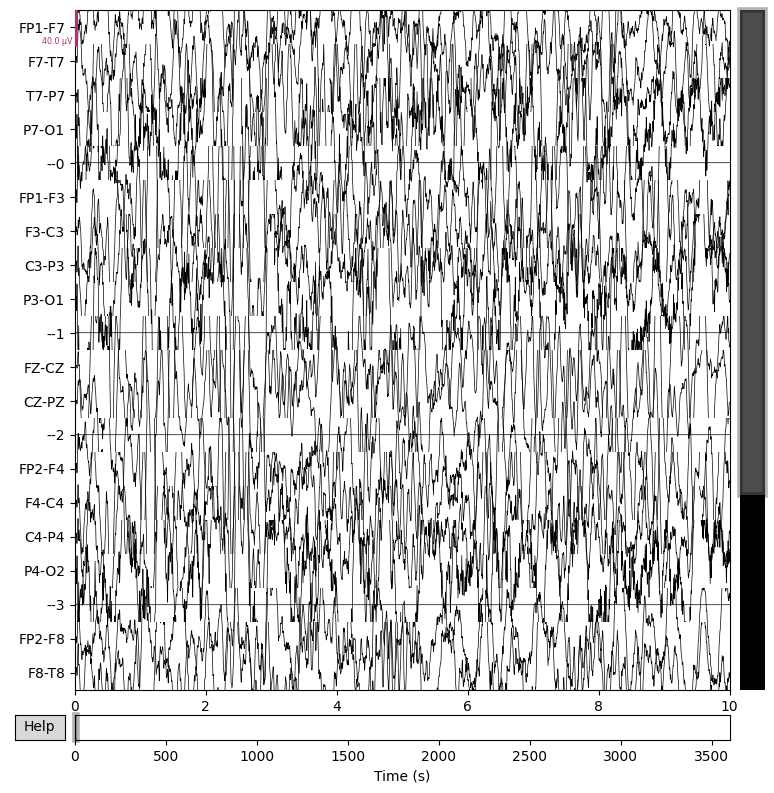

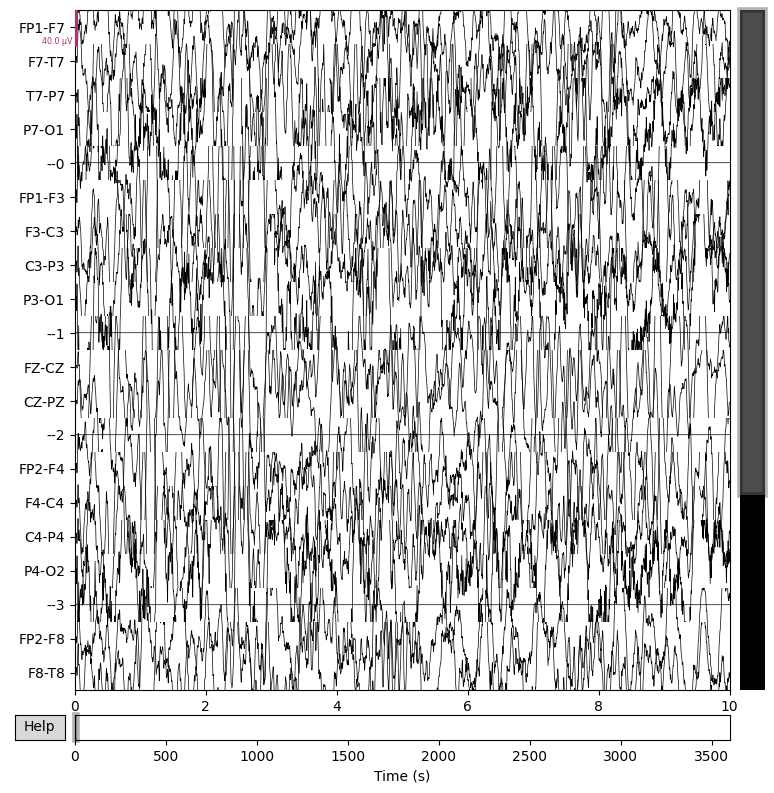

In [17]:
data.plot()

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/tmp/ipykernel_2416/300641692.py:1: UserWarning: Infinite value in PSD for channels --0, --1, --2, --3, --4.
These channels might be dead.
  data.plot_psd()
/tmp/ipykernel_2416/300641692.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


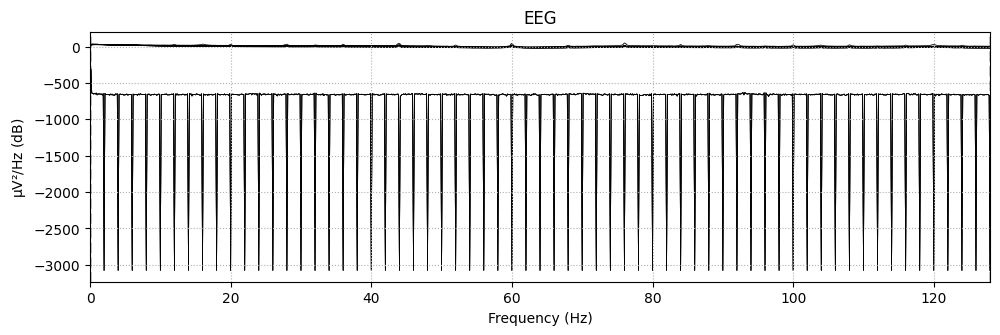

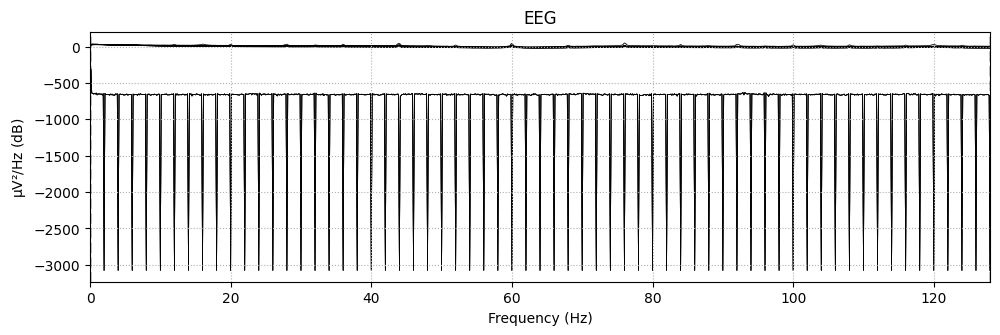

In [18]:
data.plot_psd()

In [19]:
df = data.to_data_frame()

In [20]:
print(type(data.info))
data.info

<class 'mne.io.meas_info.Info'>


<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, --0, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 28 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2058-02-27 00:20:28 UTC
 nchan: 28
 projs: []
 sfreq: 256.0 Hz
>

In [21]:
df

,time,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,-90.061050,59.194139,15.042735,151.013431,-1.0,-142.026862,68.571429,5.665446,202.979243,...,-42.393162,45.128205,-71.697192,37.704518,-1.0,-14.652015,-949.645910,901.196581,117.411477,-71.697192
1,0.003906,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.976801,-0.586081,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,-2.539683,2.930403,0.195360,0.195360
3,0.011719,-0.586081,-0.195360,0.195360,0.195360,-1.0,-0.976801,0.195360,0.195360,0.195360,...,-0.195360,0.195360,0.195360,0.195360,-1.0,0.195360,-23.638584,24.029304,0.195360,0.195360
4,0.015625,0.195360,-0.195360,-0.976801,2.930403,-1.0,0.195360,-0.195360,-0.976801,3.711844,...,0.195360,-0.586081,-0.976801,3.321123,-1.0,1.367521,-9.572650,8.791209,0.586081,-0.976801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,3599.980469,-71.306471,-20.122100,7.619048,27.155067,-1.0,-77.167277,-9.963370,42.002442,-10.354090,...,-53.333333,51.379731,31.062271,3.711844,-1.0,-7.228327,93.968254,-111.159951,45.128205,31.062271
921596,3599.984375,-62.710623,-40.048840,20.903541,27.155067,-1.0,-64.664225,-10.354090,38.485958,-18.559219,...,-38.485958,51.379731,18.559219,4.102564,-1.0,-20.512821,356.923077,-345.592186,52.161172,18.559219
921597,3599.988281,-75.604396,-31.843712,31.062271,40.830281,-1.0,-61.147741,-5.274725,24.029304,6.446886,...,-38.095238,33.406593,14.261294,30.280830,-1.0,-30.671551,73.650794,-46.691087,38.485958,14.261294
921598,3599.992188,-74.432234,-14.261294,31.062271,40.830281,-1.0,-49.816850,-4.884005,15.824176,21.684982,...,-42.393162,18.168498,19.731380,48.253968,-1.0,-30.671551,-161.172161,190.476190,13.870574,19.731380


<AxesSubplot:>

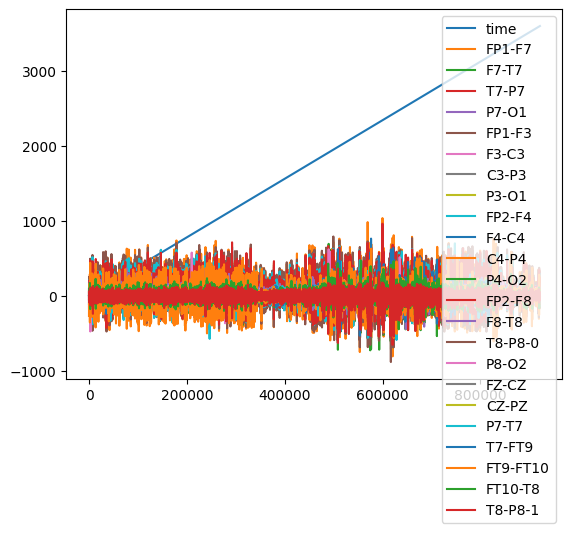

In [34]:
df.plot()

In [22]:
df.plot(subplots=True, figsize=(10, 20))

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

In [87]:
data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [88]:
for key in data.info.keys():
    print(key, data.info[key])

acq_pars None
acq_stim None
ctf_head_t None
description None
dev_ctf_t None
dig None
experimenter None
utc_offset None
device_info None
file_id None
highpass 0.0
hpi_subsystem None
kit_system_id None
helium_info None
line_freq None
lowpass 128.0
meas_date 2076-11-06 11:42:54+00:00
meas_id None
proj_id None
proj_name None
subject_info None
xplotter_layout None
gantry_angle None
bads []
chs [{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'FP1-F7', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 2, 'scanno': 2, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'F7-T7', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]